<a href="https://colab.research.google.com/github/mithunkumarsr/LearnMLWithMithun/blob/master/Feature_Selection_by_Wrapper_and_Filter_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install mlxtend

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

# Parameters to understand
sfs = SFS(knn,
          k_features=2,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0,
          n_jobs=-1)
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')

# Fit the SFS, but without passing custom_feature_names to fit
sfs = sfs.fit(X, y)

# Set the feature names after fitting
# Access the selected feature indices using sfs.k_feature_idx_
# and use them to slice the feature_names tuple
sfs.feature_names_ = [feature_names[i] for i in sfs.k_feature_idx_]

# Now you can access the selected feature names using sfs.k_feature_names_ or sfs.feature_names_
print(sfs.k_feature_names_)

('2', '3')


In [17]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)",[0.96],0.96,"(0, 1, 2, 3)",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(1, 2, 3)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(2, 3)",NaN,0.0,NaN


# Check the page

In [ ]:
#http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/?msclkid=bd438f62ae9a11ecb61982e554e0e047

# RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Selected Features: ['radius error' 'worst radius' 'worst texture' 'worst area'
 'worst concave points']
Accuracy: 0.9737
F1 Score: 0.9790


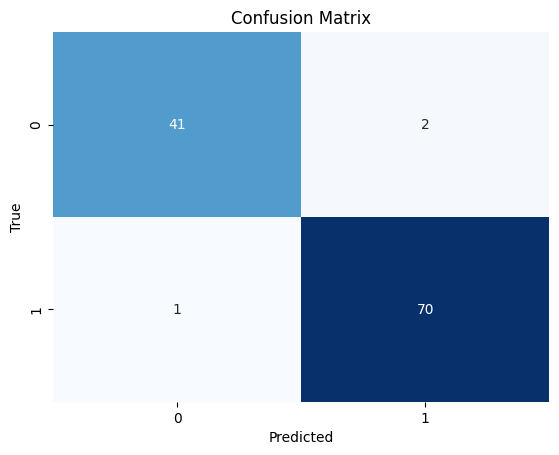

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



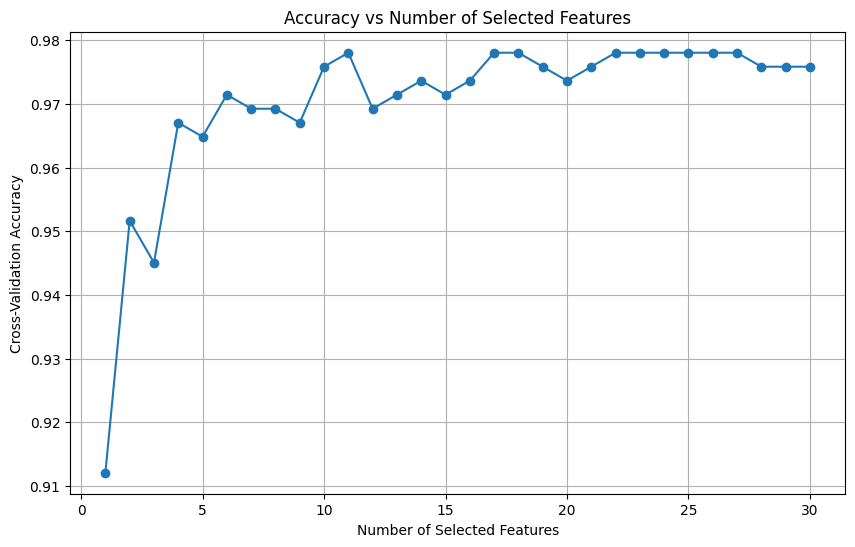

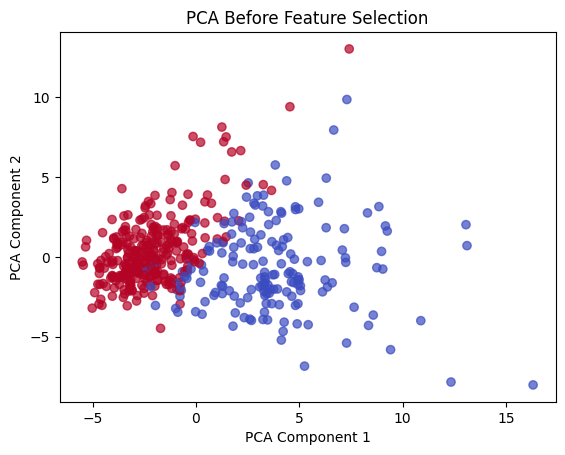

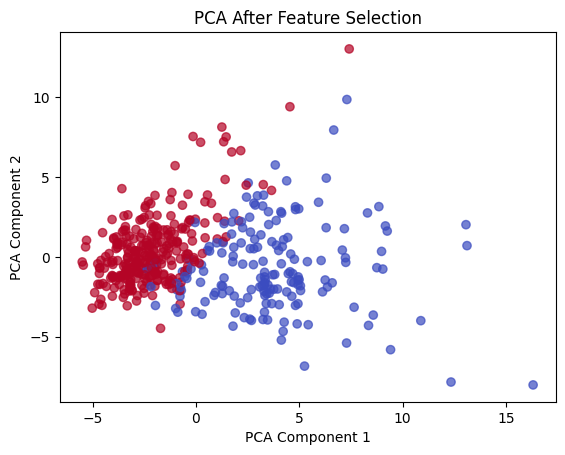

In [20]:
# Lab: Feature Selection using Wrapper Method (RFE)
# Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset
# Objective: Apply feature selection using RFE and visualize the impact on model performance

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Step 2: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")

print(f"Dataset Shape: {X.shape}")
print(f"Feature Names: {cancer.feature_names}")

# Step 3: Data Preprocessing (scaling the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=10000)

# Step 6: Implement Recursive Feature Elimination (RFE) for feature selection
# Select 5 most relevant features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = np.array(cancer.feature_names)[rfe.support_]
print(f"Selected Features: {selected_features}")

# Step 7: Train the Logistic Regression model using selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = model.predict(X_test_rfe)

# Step 8: Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Step 9: Visualize model performance vs number of features
num_features = range(1, X.shape[1] + 1)
cv_scores = []

# Use cross-validation to measure accuracy with different numbers of features
for i in num_features:
    rfe = RFE(estimator=model, n_features_to_select=i)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    cv_score = np.mean(cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='accuracy'))
    cv_scores.append(cv_score)

# Plot number of features vs cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(num_features, cv_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs Number of Selected Features')
plt.grid(True)
plt.show()

# Step 10: PCA Visualization of Selected Features
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)

# PCA before feature selection
X_train_pca = pca.fit_transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA Before Feature Selection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# PCA after feature selection
X_train_rfe_pca = pca.fit_transform(X_train_rfe)
plt.scatter(X_train_rfe_pca[:, 0], X_train_rfe_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA After Feature Selection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



# Using Models to select features - Embedded Methods

In [26]:
# Lab: Feature Selection using Wrapper Method (RFE)
# Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset
# Objective: Apply feature selection using RFE and visualize the impact on model performance

# ... (previous code) ...

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("MSE on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()

# Use the original DataFrame's columns instead of X_train.columns
lasso_coeff["Columns"] = X.columns  # X is the original Pandas DataFrame
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

MSE on test set 0.2349516648764769
                    Columns  Coefficient Estimate
0               mean radius                  -0.0
1              mean texture                  -0.0
2            mean perimeter                  -0.0
3                 mean area                  -0.0
4           mean smoothness                  -0.0
5          mean compactness                  -0.0
6            mean concavity                  -0.0
7       mean concave points                  -0.0
8             mean symmetry                  -0.0
9    mean fractal dimension                   0.0
10             radius error                  -0.0
11            texture error                   0.0
12          perimeter error                  -0.0
13               area error                  -0.0
14         smoothness error                   0.0
15        compactness error                  -0.0
16          concavity error                  -0.0
17     concave points error                  -0.0
18           sy

# Using Random Forest to Select features

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import for splitting data

# ... (Assuming X and y are your features and target variable) ...

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train) # Now x_train and y_train are defined
importances = rf.feature_importances_

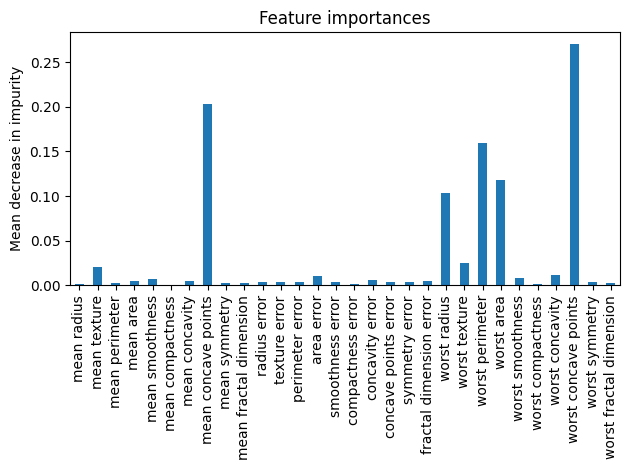

In [29]:
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
